<hr size="5" />

### **<font color='DarkCyan'>Salzburg University of Applied Sciences - 2023**  
#### **<font color='DarkCyan'>Information Technology & Systems Engineering**

# **<font color='GoldenRod'>Master Thesis**  
## **<font color='GoldenRod'>Deep Learning for Advancing Animal Breeding: A Study on Austrian Fleckvieh Cattle**

<hr size="5">

#### Student Name: Jakob Ganitzer
#### Degree Program:  ITSM-B

<hr size="5" />

### Imports

In [1]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
import random
import cairosvg

### Load Data

In [2]:
dataRoot = "/data/_"

In [4]:
heritability = "/h40"

In [5]:
phenotype_path = dataRoot + heritability + heritability + "_simu.dat"
snp_path = dataRoot + heritability + heritability + "_simu.snp"
benchmark_path = dataRoot + heritability + heritability + "_simu.bv"
pedigree_path = dataRoot + heritability + heritability + "_simu.ped"
snpPos_path = dataRoot + heritability + heritability + "_simu_snp.txt"
qtl_path = dataRoot + heritability + heritability + "_simu_qtl.txt"

In [6]:
trainPath = '/snp_pheno_BPpos_maf.parquet'
testPath = '/snpTruePheno_gen30_BPpos_maf.parquet'

In [7]:
sns.set_style("darkgrid")
sns.set_context("paper")

In [61]:
df_lR = pd.read_csv('learningRate.csv', sep=",")

In [18]:
cairosvg.svg2pdf(url='images/transformerArchitectures' + '.svg', write_to='images/transformerArchitectures'  + '.pdf')

In [ ]:
df_metrics = pd.read_parquet(dataRoot + heritability + '/eval_dataframes/' + 'metrics' + '.parquet', engine='pyarrow')
df_metrics

In [30]:
# Create a color palette
palette = sns.color_palette("husl", n_colors=len(df_metrics))
random.shuffle(palette)
df_metrics['Color'] = palette

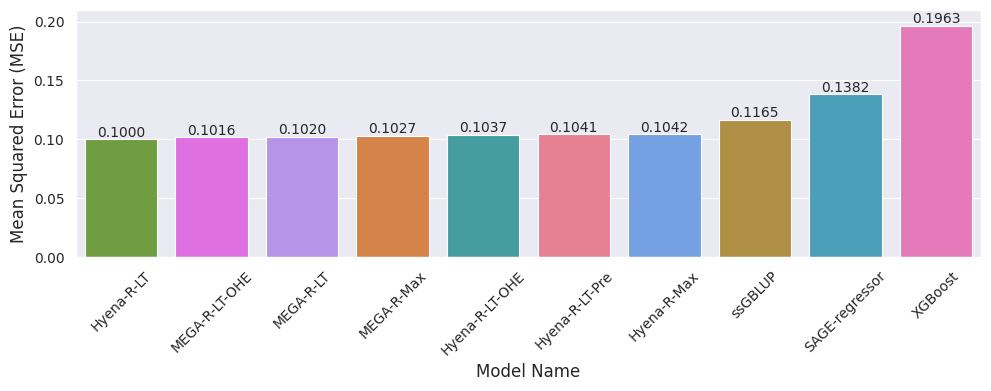

In [12]:
metric = 'MSE'
models_to_exclude = ['Foo1', 'Foo2', 'Foo3'] 
filtered_df = df_metrics[~df_metrics['Name'].isin(models_to_exclude)]
filtered_df = filtered_df.sort_values(by=metric)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Name', y=metric, data=filtered_df, palette=filtered_df['Color'])
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=10)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(rotation=45) 
plt.tick_params(axis='both', which='major', labelsize=10) 
plt.tight_layout()

new_ylim = (0.0, 0.21) 
ax.set_ylim(new_ylim)

plt.tight_layout()
plt.savefig('images/mse' + '.png')
plt.savefig('images/mse' +  '.svg', format='svg', dpi=300)
cairosvg.svg2pdf(url='images/mse' + '.svg', write_to='images/mse' + '.pdf')
plt.savefig('images/mse' + '.eps', format='eps')

plt.show()

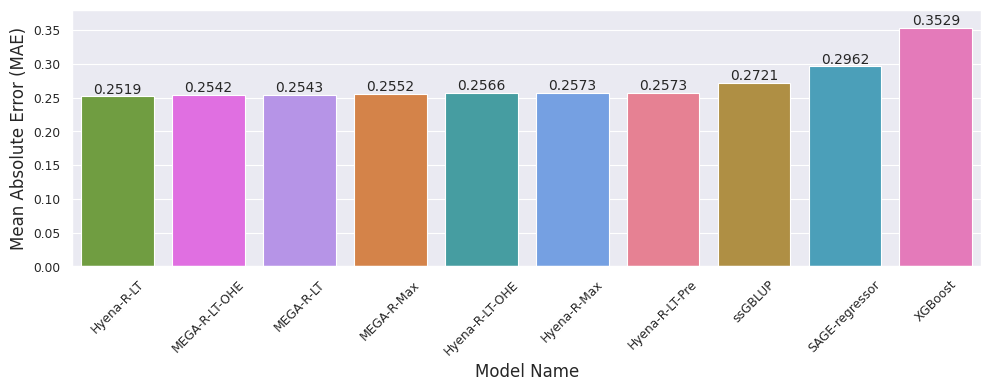

In [13]:
metric = 'MAE'
models_to_exclude = ['Foo1', 'Foo2', 'Foo3'] 
filtered_df = df_metrics[~df_metrics['Name'].isin(models_to_exclude)]
filtered_df = filtered_df.sort_values(by=metric)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Name', y=metric, data=filtered_df, palette=filtered_df['Color'])
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=10)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()

new_ylim = (0.0, 0.38)  
ax.set_ylim(new_ylim)
plt.tight_layout()
plt.savefig('images/mae' + '.png')
plt.savefig('images/mae' +  '.svg', format='svg', dpi=300)
cairosvg.svg2pdf(url='images/mae' + '.svg', write_to='images/mae' + '.pdf')
plt.savefig('images/mae' + '.eps', format='eps')
plt.show()

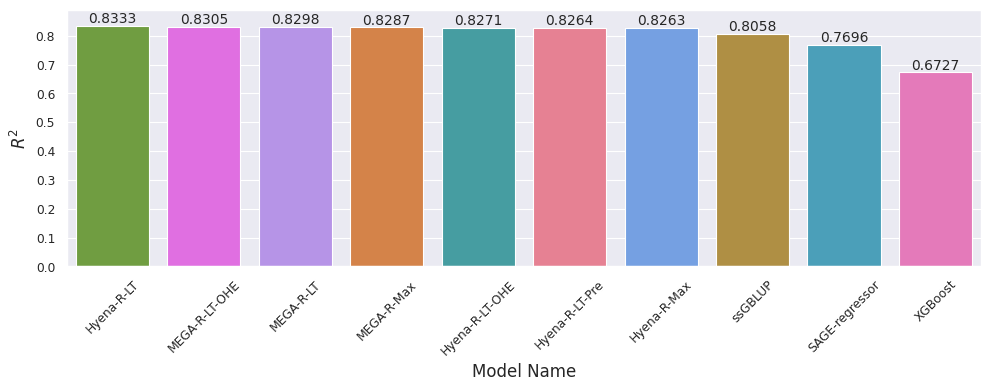

In [14]:
metric = 'R2'
models_to_exclude = ['Foo1', 'Foo2', 'Foo3'] 
filtered_df = df_metrics[~df_metrics['Name'].isin(models_to_exclude)]
filtered_df = filtered_df.sort_values(by=metric, ascending=False)


plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Name', y=metric, data=filtered_df, palette=filtered_df['Color'])
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=10)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel(r'$R^2$', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()

new_ylim = (0.0, 0.89)  
ax.set_ylim(new_ylim)

plt.tight_layout()
plt.savefig('images/r2' + '.png')
plt.savefig('images/r2' +  '.svg', format='svg', dpi=300)
cairosvg.svg2pdf(url='images/r2' + '.svg', write_to='images/r2' + '.pdf')
plt.savefig('images/r2' + '.eps', format='eps')
plt.show()

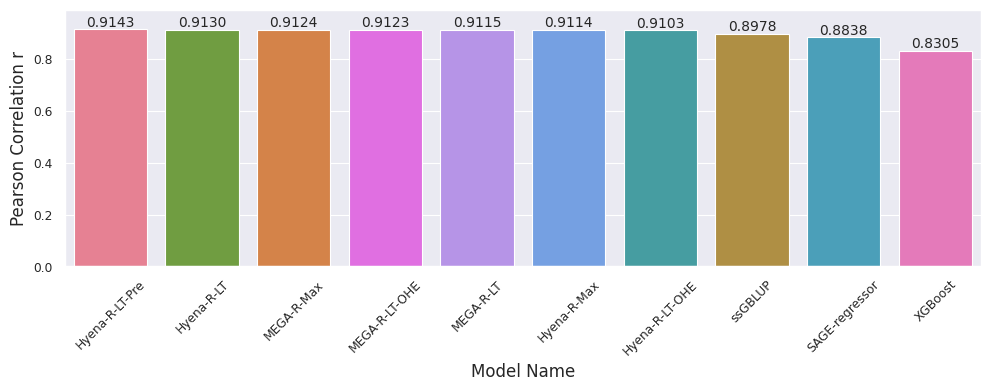

In [15]:
metric = 'PearsonR'
models_to_exclude = ['Foo1', 'Foo2', 'Foo3'] 
filtered_df = df_metrics[~df_metrics['Name'].isin(models_to_exclude)]
filtered_df = filtered_df.sort_values(by=metric, ascending=False)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Name', y=metric, data=filtered_df, palette=filtered_df['Color'])
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=10)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Pearson Correlation r', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()

new_ylim = (0.0, 0.99)  
ax.set_ylim(new_ylim)

plt.tight_layout()
plt.savefig('images/pearsonR' + '.png')
plt.savefig('images/pearsonR' +  '.svg', format='svg', dpi=300)
cairosvg.svg2pdf(url='images/pearsonR' + '.svg', write_to='images/pearsonR' + '.pdf')
plt.savefig('images/pearsonR' + '.eps', format='eps')
plt.show()

In [6]:
df_snpPos = pd.read_csv(snpPos_path, sep=" ")
df_snpPos

,id,chr,site,BPpos
0,1,1,1,0
1,2,1,2,14939
2,3,1,4,56166
3,4,1,8,109246
4,5,1,10,126268
...,...,...,...,...
49795,49796,30,4218,99759687
49796,49797,30,4219,99763695
49797,49798,30,4221,99849452
49798,49799,30,4222,99849783


In [ ]:
df_train_maf = pd.read_parquet(dataRoot + heritability + trainPath, engine='pyarrow')
df_train_maf

In [ ]:
df_test_maf = pd.read_parquet(dataRoot + heritability + testPath, engine='pyarrow')
df_test_maf

In [44]:
df_train_maf['phenotype'].describe()

count    210000.000000
mean         10.956080
std           1.869080
min           2.531507
25%           9.666236
50%          10.968464
75%          12.254045
max          18.932514
Name: phenotype, dtype: float64

In [45]:
df_test_maf['phenotype'].describe()

count    42000.000000
mean        13.073609
std          0.774423
min          9.853229
25%         12.554961
50%         13.076120
75%         13.602256
max         15.987260
Name: phenotype, dtype: float64

In [13]:
#sns.set_theme()

In [14]:
sns.set_style("darkgrid")
sns.set_context("paper")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


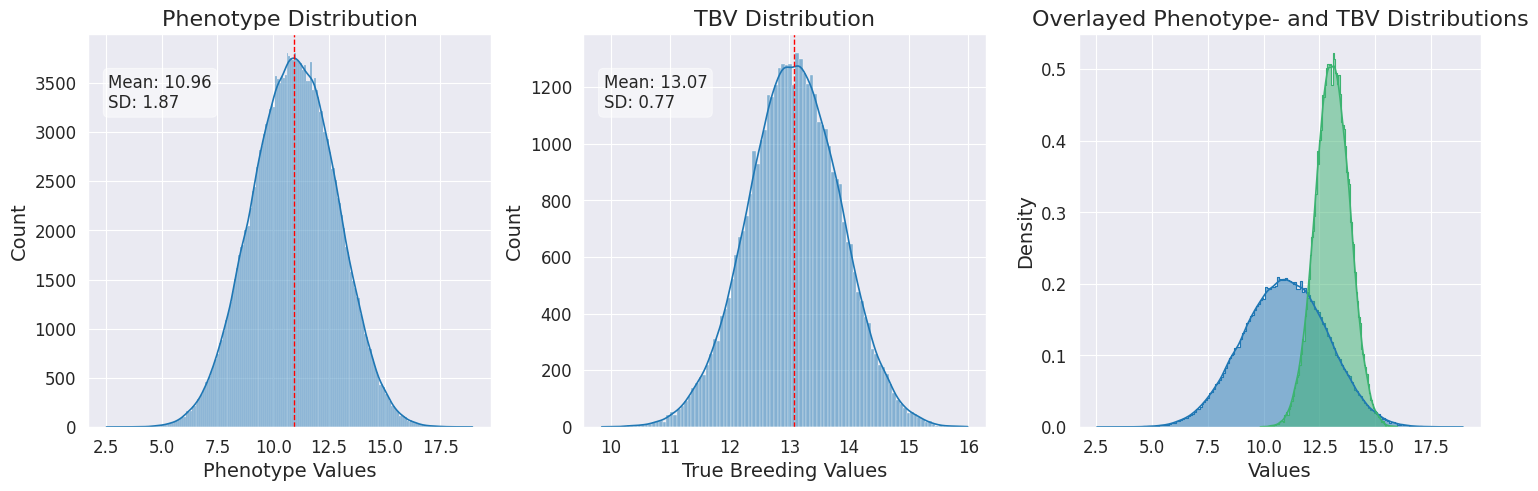

In [46]:
def plot_histograms(phenotypes, testTBV, imageName):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.histplot(phenotypes, ax=axs[0], kde=True, label='Phenotype Distribution')
    sns.histplot(testTBV, ax=axs[1], kde=True, label='TBV Distribution')

    # Calculate mean and standard deviation
    phenotype_mean = np.mean(phenotypes)
    phenotype_std = np.std(phenotypes)
    testTBV_mean = np.mean(testTBV)
    testTBV_std = np.std(testTBV)

    # Add mean and standard deviation as text annotations
    axs[0].text(0.05, 0.9, f'Mean: {phenotype_mean:.2f}\nSD: {phenotype_std:.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    axs[1].text(0.05, 0.9, f'Mean: {testTBV_mean:.2f}\nSD: {testTBV_std:.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Add lines for mean
    axs[0].axvline(phenotype_mean, color='red', linestyle='dashed', linewidth=1)
    axs[1].axvline(testTBV_mean, color='red', linestyle='dashed', linewidth=1)

    # Overlay histograms using Seaborn
    sns.histplot(phenotypes, ax=axs[2], kde=True, label='Phenotypes', element='step',stat='density')
    sns.histplot(testTBV, ax=axs[2], color='mediumseagreen', kde=True, label='TBV', element='step', stat='density')
    
    axs[0].tick_params(axis='both', which='major', labelsize=12) 
    axs[1].tick_params(axis='both', which='major', labelsize=12) 
    axs[2].tick_params(axis='both', which='major', labelsize=12) 
    
    # Add labels and titles
    axs[0].set_xlabel('Phenotype Values', fontsize=14)
    axs[0].set_ylabel('Count', fontsize=14)
    axs[0].set_title('Phenotype Distribution',fontsize=16)

    axs[1].set_xlabel('True Breeding Values', fontsize=14)
    axs[1].set_ylabel('Count', fontsize=14)
    axs[1].set_title('TBV Distribution', fontsize=16)
    
    axs[2].set_xlabel('Values', fontsize=14)
    axs[2].set_ylabel('Density', fontsize=14)
    axs[2].set_title('Overlayed Phenotype- and TBV Distributions', fontsize=16)

    # Show the plots
    plt.tight_layout()
    plt.savefig('images/dist_' + imageName + '.png')
    plt.savefig('images/dist_' + imageName + '.svg', format='svg', dpi=300)
    cairosvg.svg2pdf(url='images/dist_' + imageName + '.svg', write_to='images/dist_' + imageName + '.pdf')
    plt.savefig('images/dist_' + imageName + '.eps', format='eps')
    plt.show()

plot_histograms(df_train_maf['phenotype'], df_test_maf['phenotype'], 'phenoTBV')

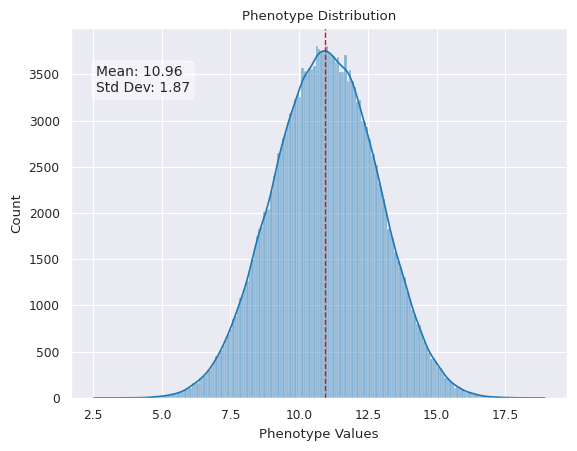

In [51]:
# Calculate mean and standard deviation
output_mean = np.mean(df_train_maf['phenotype'])
output_std = np.std(df_train_maf['phenotype'])

sns.histplot(df_train_maf['phenotype'], kde=True)
plt.text(0.05, 0.9, f'Mean: {output_mean:.2f}\nStd Dev: {output_std:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Add lines for mean
plt.axvline(output_mean, color='red', linestyle='dashed', linewidth=1)

plt.title('Phenotype Distribution')
plt.xlabel('Phenotype Values')
plt.ylabel('Count')
plt.show()

In [ ]:
mafSNPs = df_test_maf.drop(columns=['phenotype', 'id'])

In [55]:
# Extract unique values from 'BPpos' column in df_snpPos
unique_BPpos_values = df_snpPos['id'].unique()

# Filter column names in mafSNPs to find matches with unique BPpos values
matching_columns = [col for col in mafSNPs.columns if any(str(pos) in col for pos in unique_BPpos_values)]

# Create a new DataFrame using the filtered columns from mafSNPs
new_df_snpPos = df_snpPos[df_snpPos['id'].isin([int(col.split('_')[1]) for col in matching_columns])]

In [56]:
new_df_snpPos

,id,chr,site,BPpos
3,4,1,8,109246
8,9,1,32,562825
9,10,1,38,759076
11,12,1,41,773518
12,13,1,44,808884
...,...,...,...,...
49790,49791,30,4211,99506472
49792,49793,30,4213,99588816
49793,49794,30,4214,99608399
49794,49795,30,4217,99753195


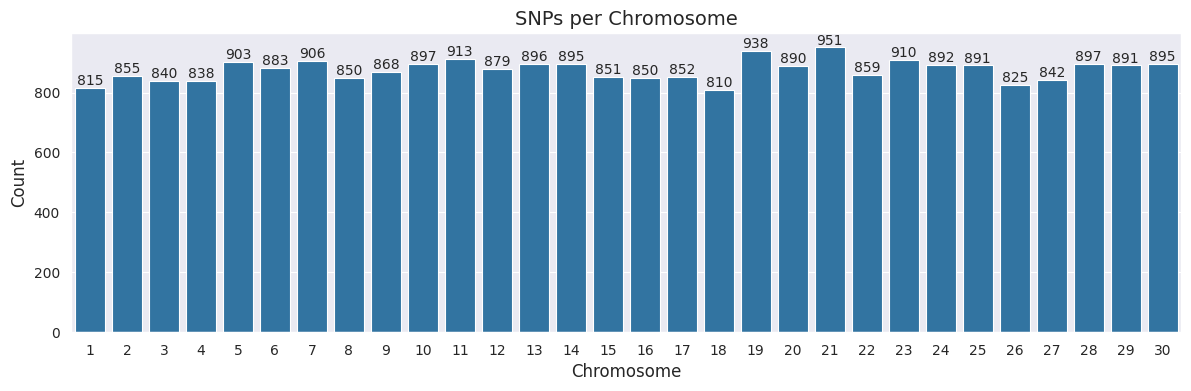

In [59]:

sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(12, 4))

ax = sns.countplot(data=new_df_snpPos, x='chr', hue='col')
ax.bar_label(ax.containers[0], fontsize=10)
ax.legend_.remove()  

plt.tick_params(axis='both', which='major', labelsize=10) 
plt.title('SNPs per Chromosome', fontsize=14)
plt.xlabel('Chromosome', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plots
plt.tight_layout()
plt.savefig('images/chromosomeDistribution' + '.png')
plt.savefig('images/chromosomeDistribution' +  '.svg', format='svg', dpi=300)
cairosvg.svg2pdf(url='images/chromosomeDistribution' + '.svg', write_to='images/chromosomeDistribution' + '.pdf')
plt.savefig('images/chromosomeDistribution' + '.eps', format='eps')
plt.show()

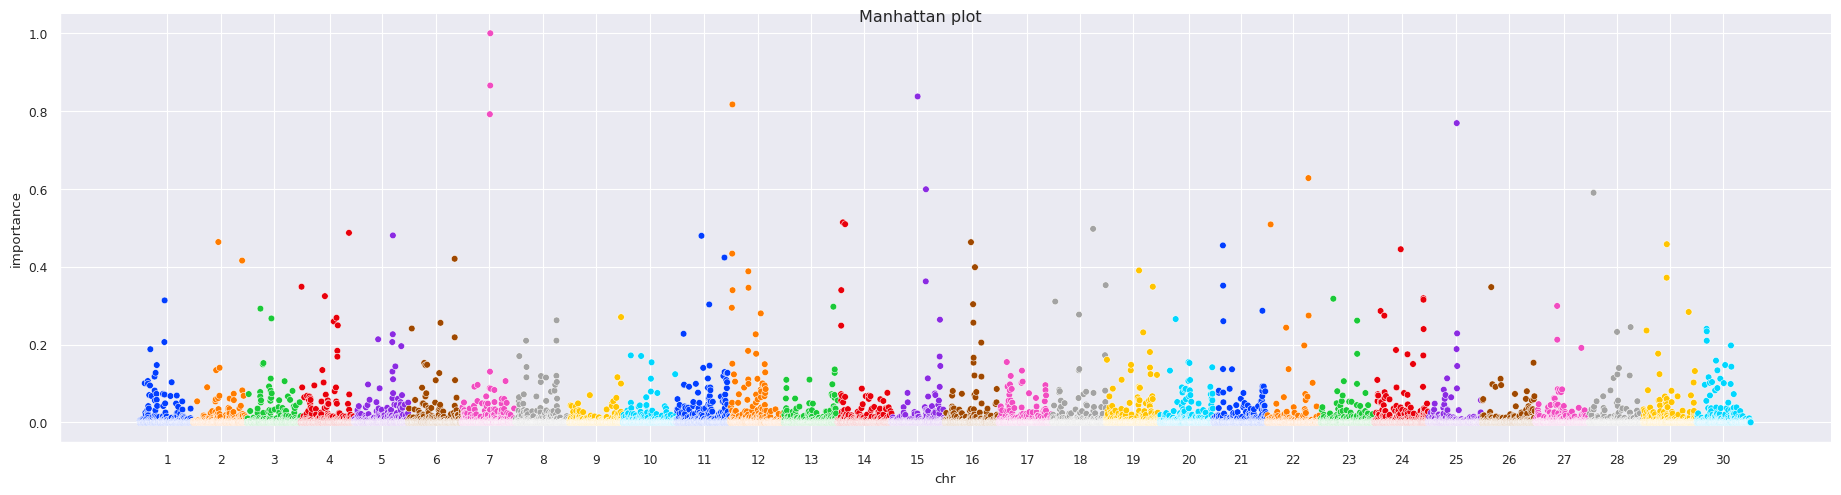

In [79]:
# Generate Manhattan plot: (#optional tweaks for relplot: linewidth=0, s=9)
plot = sns.relplot(data=new_df_snpPos, x='id', y='importance', aspect=3.7, 
                   hue='chr', palette = 'bright', legend=None) 
chrom_df=new_df_snpPos.groupby('chr')['id'].median()
plot.ax.set_xlabel('chr'); plot.ax.set_xticks(chrom_df)
plot.ax.set_xticklabels(chrom_df.index)
plot.fig.suptitle('Manhattan plot')


In [ ]:
chr_counts = new_df_snpPos['chr'].value_counts()
chr_counts_sorted = new_df_snpPos['chr'].value_counts().sort_index()

In [7]:
df_ped = pd.read_csv(pedigree_path, sep=" ", header=None, names=["id", "sire", "dam", "generation", "sex"])

In [ ]:
idsWithSNPs = first_column_df
idsWithSNPs = idsWithSNPs.rename(columns={idsWithSNPs.columns[0]: 'id'})

In [10]:
df_dam = df_ped[df_ped['sex'] == 'F']

df_sire = df_ped[df_ped['sex'] == 'M']

In [12]:
df_sire

,id,sire,dam,generation,sex
0,1.0,0,0.0,0,M
1,2.0,0,0.0,0,M
2,3.0,0,0.0,0,M
3,4.0,0,0.0,0,M
4,5.0,0,0.0,0,M
...,...,...,...,...,...
1302190,1302191.0,1241531,1067298.0,30,M
1302192,1302193.0,1247479,1013122.0,30,M
1302194,1302195.0,1223725,1218938.0,30,M
1302196,1302197.0,1220769,1162800.0,30,M


In [13]:
df_dam

,id,sire,dam,generation,sex
200,201.0,0,0.0,0,F
201,202.0,0,0.0,0,F
202,203.0,0,0.0,0,F
203,204.0,0,0.0,0,F
204,205.0,0,0.0,0,F
...,...,...,...,...,...
1302191,1302192.0,1251543,1193062.0,30,F
1302193,1302194.0,1232357,1153656.0,30,F
1302195,1302196.0,1247495,1138222.0,30,F
1302197,1302198.0,1242187,1083544.0,30,F


In [9]:
df_animal30 = df_ped[df_ped['generation'] == 30]
df_animal30

,id,sire,dam,generation,sex
1260200,1260201.0,1251543,1106246.0,30,M
1260201,1260202.0,1247479,1156062.0,30,F
1260202,1260203.0,1232357,1210386.0,30,M
1260203,1260204.0,1223725,1227532.0,30,F
1260204,1260205.0,1247495,1226804.0,30,M
...,...,...,...,...,...
1302195,1302196.0,1247495,1138222.0,30,F
1302196,1302197.0,1220769,1162800.0,30,M
1302197,1302198.0,1242187,1083544.0,30,F
1302198,1302199.0,1222833,1134422.0,30,M


In [15]:
df_dam30 = df_dam[df_dam['generation'] == 30]

In [15]:
df_dam30

,id,sire,dam,generation,sex
1260201,1260202.0,1247479,1156062.0,30,F
1260203,1260204.0,1223725,1227532.0,30,F
1260205,1260206.0,1220769,1146648.0,30,F
1260207,1260208.0,1222833,1118446.0,30,F
1260209,1260210.0,1227643,1177400.0,30,F
...,...,...,...,...,...
1302191,1302192.0,1251543,1193062.0,30,F
1302193,1302194.0,1232357,1153656.0,30,F
1302195,1302196.0,1247495,1138222.0,30,F
1302197,1302198.0,1242187,1083544.0,30,F


In [16]:
df_qtl = pd.read_csv(qtl_path, sep=" ")

In [17]:
df_qtl

,id,chr,site,BPpos,eff
0,1,1,203,5039213,0.125499
1,2,1,352,8491435,-0.047612
2,3,1,459,11581435,0.054814
3,4,1,640,15389863,-0.095454
4,5,1,645,15456956,-0.062020
...,...,...,...,...,...
895,896,30,3394,79599063,-0.024650
896,897,30,3410,80026127,0.110102
897,898,30,3671,86337673,-0.005790
898,899,30,3946,92987513,0.018326


In [18]:
df_qtl['eff'].describe()

count    900.000000
mean      -0.000612
std        0.081529
min       -0.248360
25%       -0.054259
50%        0.002011
75%        0.054907
max        0.242647
Name: eff, dtype: float64

In [ ]:
chr_counts = df_qtl['chr'].value_counts()

In [10]:
df_benchmark = pd.read_csv(benchmark_path, sep=" ")

In [11]:
df_benchmark

,id,gen,true,sstep,konv
0,1.0,0,1.122668,-0.6755,-4.7152
1,2.0,0,-0.246784,-2.3505,-6.3914
2,3.0,0,0.354400,-1.9892,-6.0297
3,4.0,0,0.028821,-2.0263,-6.0674
4,5.0,0,0.544295,-1.5597,-5.6007
...,...,...,...,...,...
1302195,1302196.0,30,12.328599,9.8970,6.9155
1302196,1302197.0,30,13.126906,11.8030,6.9374
1302197,1302198.0,30,12.830373,11.2940,7.0339
1302198,1302199.0,30,12.470817,10.6690,7.1215


In [12]:
#Adjustment for right step correction
df_benchmark['sstep'] += 2.0816
df_benchmark

,id,gen,true,sstep,konv
0,1.0,0,1.122668,1.4061,-4.7152
1,2.0,0,-0.246784,-0.2689,-6.3914
2,3.0,0,0.354400,0.0924,-6.0297
3,4.0,0,0.028821,0.0553,-6.0674
4,5.0,0,0.544295,0.5219,-5.6007
...,...,...,...,...,...
1302195,1302196.0,30,12.328599,11.9786,6.9155
1302196,1302197.0,30,13.126906,13.8846,6.9374
1302197,1302198.0,30,12.830373,13.3756,7.0339
1302198,1302199.0,30,12.470817,12.7506,7.1215


In [13]:
df_pheno = pd.read_csv(phenotype_path , sep=" ", header=None, names=["id", "fixed_effect", "phenotype"])

In [14]:
df_pheno

,id,fixed_effect,phenotype
0,201.0,1,0.766089
1,202.0,1,1.853758
2,203.0,1,0.970537
3,204.0,1,0.362347
4,205.0,1,0.875165
...,...,...,...
650995,1260192.0,1,14.630073
650996,1260194.0,1,11.466613
650997,1260196.0,1,13.342062
650998,1260198.0,1,11.703152


In [21]:
# joint df_snp_table and df_pheno by id and remove fixed_effect column

df_snp_pheno = df_snp_table.merge(df_pheno, on="id").drop("fixed_effect", axis=1)


In [16]:
df_benchmark30 = df_benchmark[df_benchmark['gen'] == 30]
df_benchmark30

,id,gen,true,sstep,konv
1260200,1260201.0,30,11.589902,11.7622,6.7207
1260201,1260202.0,30,12.947343,12.7906,7.0470
1260202,1260203.0,30,13.418496,13.4066,7.0948
1260203,1260204.0,30,12.595989,12.7676,7.3663
1260204,1260205.0,30,11.533833,11.6954,7.3972
...,...,...,...,...,...
1302195,1302196.0,30,12.328599,11.9786,6.9155
1302196,1302197.0,30,13.126906,13.8846,6.9374
1302197,1302198.0,30,12.830373,13.3756,7.0339
1302198,1302199.0,30,12.470817,12.7506,7.1215


In [15]:
merged_df = df_animal30.merge(df_benchmark, on='id', how='left')
benchmarkGen30 = merged_df[['id', 'true', 'sstep', 'konv']].copy()
benchmarkGen30

,id,true,sstep,konv
0,1260201.0,11.589902,11.7622,6.7207
1,1260202.0,12.947343,12.7906,7.0470
2,1260203.0,13.418496,13.4066,7.0948
3,1260204.0,12.595989,12.7676,7.3663
4,1260205.0,11.533833,11.6954,7.3972
...,...,...,...,...
41995,1302196.0,12.328599,11.9786,6.9155
41996,1302197.0,13.126906,13.8846,6.9374
41997,1302198.0,12.830373,13.3756,7.0339
41998,1302199.0,12.470817,12.7506,7.1215


In [49]:
# Check how many sire have a phenotype
sire_pheno = pd.merge(df_sire, df_pheno['id'], on='id', how='inner')
sire_pheno

,id,sire,dam,generation,sex


In [ ]:
#Conclusion: Sire do not have phenotypes

In [37]:
# Check how many dam have a phenotype
dam_pheno = pd.merge(df_dam, df_pheno['id'], on='id', how='inner')

In [38]:
dam_pheno

,id,sire,dam,generation,sex
0,201.0,0,0.0,0,F
1,202.0,0,0.0,0,F
2,203.0,0,0.0,0,F
3,204.0,0,0.0,0,F
4,205.0,0,0.0,0,F
...,...,...,...,...,...
650995,1260192.0,1217045,1179200.0,29,F
650996,1260194.0,1195579,1143838.0,29,F
650997,1260196.0,1194171,1099760.0,29,F
650998,1260198.0,1183641,1151118.0,29,F


In [ ]:
# Conclusion: only dam have a phenotype

In [47]:
df_dam.shape[0] - dam_pheno.shape[0]

21000

In [ ]:
# Conclusion: the last 21000 dam do not have a phenotype / Gen30

In [44]:
# Check how many dam have a phenotype and snps
dam_phenoSNP = pd.merge(dam_pheno, idsWithSNPs['id'], on='id', how='inner')
dam_phenoSNP

,id,sire,dam,generation,sex
0,840202.0,822683,636228.0,20,F
1,840204.0,827597,788398.0,20,F
2,840206.0,819127,651184.0,20,F
3,840208.0,811835,793910.0,20,F
4,840210.0,822267,753924.0,20,F
...,...,...,...,...,...
209995,1260192.0,1217045,1179200.0,29,F
209996,1260194.0,1195579,1143838.0,29,F
209997,1260196.0,1194171,1099760.0,29,F
209998,1260198.0,1183641,1151118.0,29,F


In [ ]:
# Conclusion: 210.000 dam have a phenotype and SNPs / Gen20 to Gen29

### EDA

In [35]:
rows_with_value_30 = df_dam[df_dam['generation'] == 30]

num_rows_with_value_30 = len(rows_with_value_30)
print(f"The number of rows with value 30 in the 'generation' column is: {num_rows_with_value_30}")

The number of rows with value 30 in the 'generation' column is: 21000


In [ ]:
generation_counts = df_dam['generation'].value_counts()

In [ ]:
generation_counts = df_sire['generation'].value_counts()

In [25]:
rows_with_value_30 = df_ped[df_ped['generation'] == 30]

num_rows_with_value_30 = len(rows_with_value_30)
print(f"The number of rows with value 30 in the 'generation' column is: {num_rows_with_value_30}")

The number of rows with value 30 in the 'generation' column is: 42000


In [ ]:
generation_counts = df_ped['generation'].value_counts()

<Axes: xlabel='sstep', ylabel='Count'>

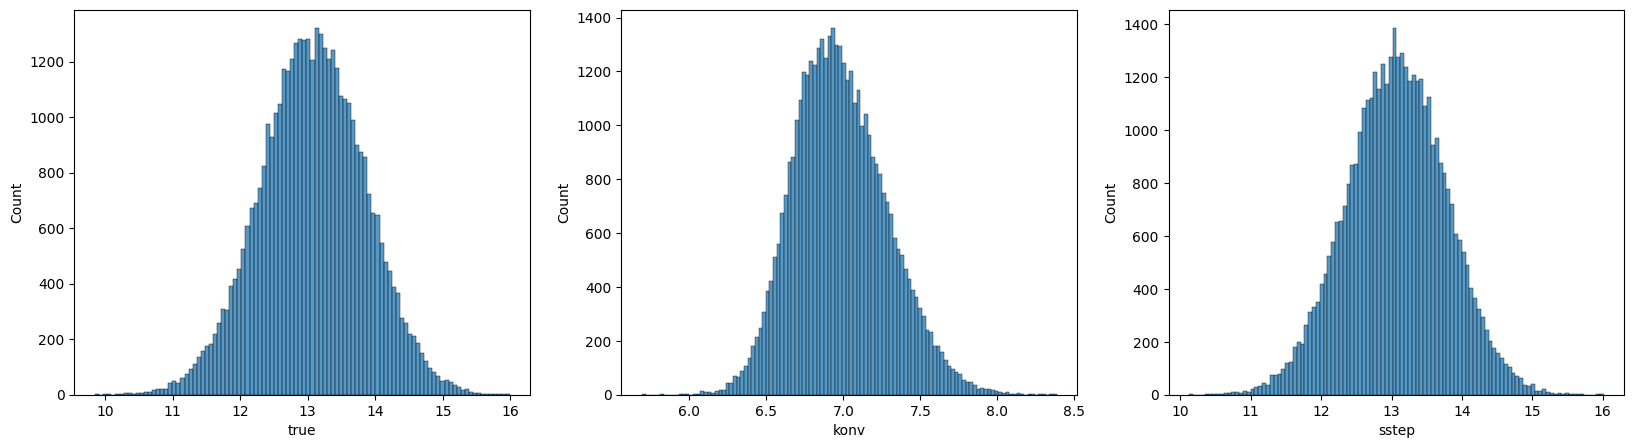

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data=benchmarkGen30, x="true", ax=axs[0])
sns.histplot(data=benchmarkGen30, x="konv", ax=axs[1])
sns.histplot(data=benchmarkGen30, x="sstep", ax=axs[2])

Text(0.05, 0.95, 'r = 0.8978')

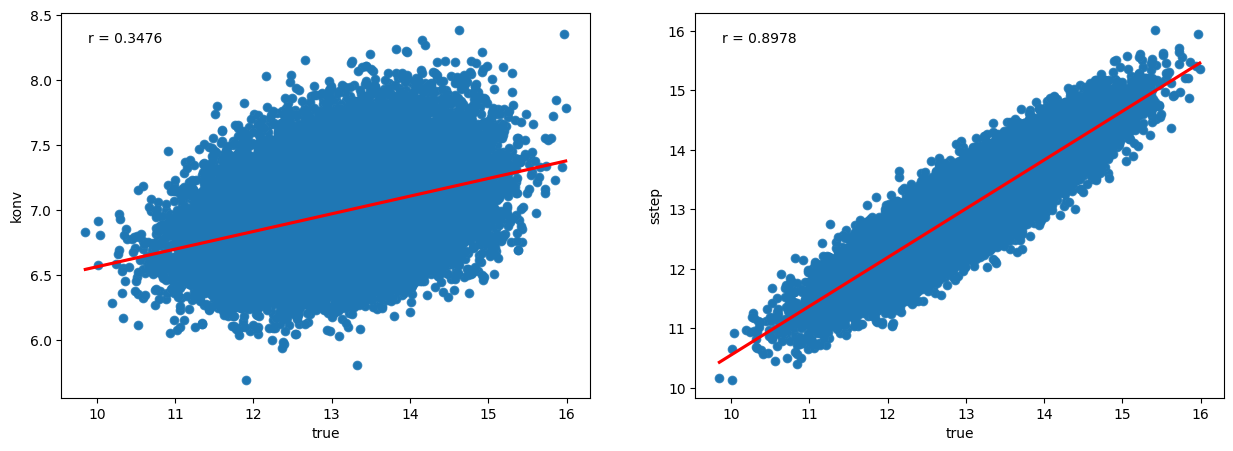

In [35]:

# Show correlation between phenotypes and true genomic values

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=benchmarkGen30, x="true", y="konv", ax=axs[0])
sns.scatterplot(data=benchmarkGen30, x="true", y="sstep", ax=axs[1])

# add trendline

sns.regplot(data=benchmarkGen30, x="true", y="konv", ax=axs[0] , line_kws={"color": "red"})
sns.regplot(data=benchmarkGen30, x="true", y="sstep", ax=axs[1], line_kws={"color": "red"})

# add correlation coefficient

r2 = benchmarkGen30["true"].corr(benchmarkGen30["konv"])
r3 = benchmarkGen30["true"].corr(benchmarkGen30["sstep"])

axs[0].text(0.05, 0.95, "r = {:.4f}".format(r2), transform=axs[0].transAxes, va="top")
axs[1].text(0.05, 0.95, "r = {:.4f}".format(r3), transform=axs[1].transAxes, va="top")
# Show correlation between phenotypes and true genomic values


In [17]:
def calcMetrics(output, targets):
    mse = mean_squared_error(output, targets)
    mae = mean_absolute_error(targets, output)
    r2 = r2_score(targets, output)
    _pearsonr, _pvalue = pearsonr(targets, output)

    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((targets- output) / targets)) * 100
    mbe = np.mean(targets - output)
    
    print("MSE:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)
    print("Pearson Correlation Coefficient:", _pearsonr)
    print("p-value:", _pvalue)
    print("rmse:", rmse)
    print("mape:", mape)
    print("mbe:", mbe)

In [18]:
def calcMetricsStore(output, targets, modelName):
    mse = mean_squared_error(targets, output)
    mae = mean_absolute_error(targets, output)
    r2 = r2_score(targets, output)
    _pearsonr, _pvalue = pearsonr(targets, output)

    # Calculate additional metrics if needed
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((targets - output) / targets)) * 100
    mbe = np.mean(targets - output)

    # Create a dictionary with the metrics
    new_data = {
        'ModelName': modelName,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'PearsonR': _pearsonr,
    }

    # Convert the dictionary into a DataFrame
    df = pd.DataFrame([new_data])

    return df

In [19]:
sns.set_style("darkgrid")
sns.set_context("paper")

def plot_histograms(output, targets, imageName):
    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot histograms using sns.histplot
    sns.histplot(output, ax=axs[0], kde=True)
    sns.histplot(targets, ax=axs[1], color='mediumseagreen', kde=True)

    # Calculate mean and standard deviation
    output_mean = np.mean(output)
    output_std = np.std(output)
    targets_mean = np.mean(targets)
    targets_std = np.std(targets)

    # Add mean and standard deviation as text annotations
    axs[0].text(0.05, 0.9, f'Mean: {output_mean:.2f}\nSD: {output_std:.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    axs[1].text(0.05, 0.9, f'Mean: {targets_mean:.2f}\nSD: {targets_std:.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Add lines for mean
    axs[0].axvline(output_mean, color='red', linestyle='dashed', linewidth=1)
    axs[1].axvline(targets_mean, color='red', linestyle='dashed', linewidth=1)

    # Overlay histograms using Seaborn
    sns.histplot(output, ax=axs[2],  kde=True, label='EBV', element='step')
    sns.histplot(targets, ax=axs[2], color='mediumseagreen', kde=True, label='TBV', element='step')

    # Add labels and titles
    axs[0].tick_params(axis='both', which='major', labelsize=12) 
    axs[0].set_xlabel('Estimated Breeding Values', fontsize=14) 
    axs[0].set_ylabel('Count', fontsize=14)
    axs[0].set_title('EBV Distribution', fontsize=16)  

    axs[1].tick_params(axis='both', which='major', labelsize=12) 
    axs[1].set_xlabel('True Breeding Values', fontsize=14)
    axs[1].set_ylabel('Count', fontsize=14)
    axs[1].set_title('TBV Distribution', fontsize=16)

    axs[2].tick_params(axis='both', which='major', labelsize=12) 
    axs[2].set_xlabel('Values', fontsize=14)
    axs[2].set_ylabel('Count', fontsize=14)
    axs[2].set_title('Overlayed EBV and TBV Distributions', fontsize=16)


    # Add legend
    #axs[0].legend()
    #axs[1].legend()
    axs[2].legend()

    # Show the plots
    plt.tight_layout()
    plt.savefig('images/dist_' + imageName + '.png')
    plt.savefig('images/dist_' + imageName + '.svg', format='svg', dpi=300)
    cairosvg.svg2pdf(url='images/dist_' + imageName + '.svg', write_to='images/dist_' + imageName + '.pdf')
    plt.savefig('images/dist_' + imageName + '.eps', format='eps')
    plt.show()


In [20]:
def createScatterPlot(inference_df, imageName):
    # Show correlation between phenotypes

    fig, ax = plt.subplots(figsize=(5, 5)) 

    # Add trendline
    sns.regplot(data=inference_df, x="output", y="targets", ax=ax, color='darkblue',line_kws={"color": "red"}, scatter = True, scatter_kws={'s':3, 'rasterized': True})

    # Calculate slope and intercept
    slope, intercept = np.polyfit(inference_df["output"], inference_df["targets"], 1)
    line = f"TBV = {intercept:.4f} + {slope:.4f} x EBV"  

    # Plot slope and intercept
    ax.text(0.05, 0.90, line, transform=ax.transAxes, va="top", fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    ax.axline((9.8, 9.8), slope=1, color='black', linestyle='--') 
    # Set axis labels
    
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel("EBV", fontsize=12)
    ax.set_ylabel("TBV", fontsize=12)
    
    ax.set_xlim(9.5, 16.5)  
    ax.set_ylim(9.5, 16.5)  
    
    
    plt.savefig('images/corr_' + imageName + '.png')
    plt.savefig('images/corr_' + imageName + '.svg', format='svg', dpi=300)
    cairosvg.svg2pdf(url='images/corr_' + imageName + '.svg', write_to='images/corr_' + imageName + '.pdf')
    plt.savefig('images/corr_' + imageName + '.eps', format='eps')
    
    plt.show()  


In [21]:
def plot_residuals(output_np, targets_np, imageName):
    # Calculate residuals
    residuals = targets_np - output_np

    # Create the figure with a single subplot for residual plot
    fig, ax = plt.subplots(figsize=(5,4))

    sns.regplot(x=output_np, y=residuals, scatter=True, ax=ax, line_kws=dict(color="r"), color='darkblue', scatter_kws={'s':3, 'rasterized': True})

    ax.axhline(y=0, color='black', linestyle='--')  
    ax.tick_params(axis='both', which='major', labelsize=10) 
    ax.set_xlabel('EBV', fontsize=12)
    ax.set_ylabel('Residuals',  fontsize=12)

    ax.set_xlim(9.5, 16.5) 
    ax.set_ylim(-1.7, 1.7) 
    
    plt.tight_layout()
    
    plt.savefig('images/resid_' + imageName + '.png')
    plt.savefig('images/resid_' + imageName + '.svg', format='svg', dpi=300)
    cairosvg.svg2pdf(url='images/resid_' + imageName + '.svg', write_to='images/resid_' + imageName + '.pdf')
    plt.savefig('images/resid_' + imageName + '.eps', format='eps')
    plt.show()

In [22]:
def stratifiedMetrics(output, targets, num_bins=3):
    # Determine bin edges
    bin_edges = np.linspace(min(targets), max(targets), num_bins+1)
    
    for i in range(num_bins):
        # Select data within the bin
        mask = (targets >= bin_edges[i]) & (targets < bin_edges[i+1])
        targets_bin = targets[mask]
        output_bin = output[mask]
        
        mae = mean_absolute_error(targets_bin, output_bin)
        
        print(f"\nMetrics for Bin {i+1}:")
        print("Mean Absolute Error:", mae)

In [24]:
benchmarkGen30 = df_benchmark30

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


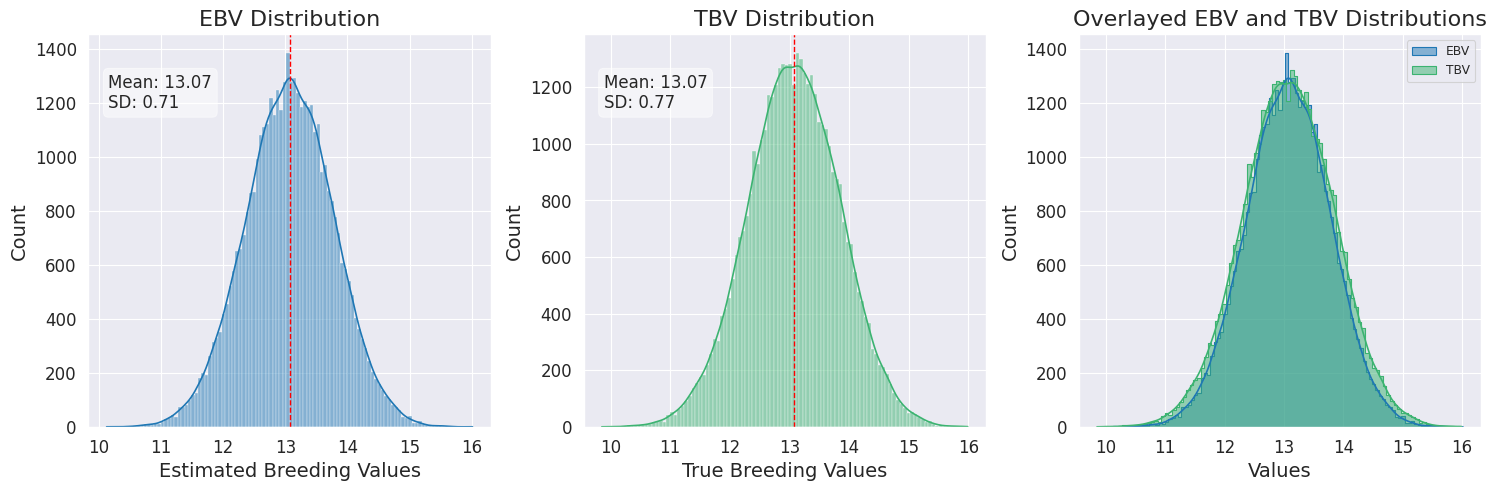

In [26]:
plot_histograms(benchmarkGen30['sstep'].values, benchmarkGen30['true'].values, 'ssGBLUP')

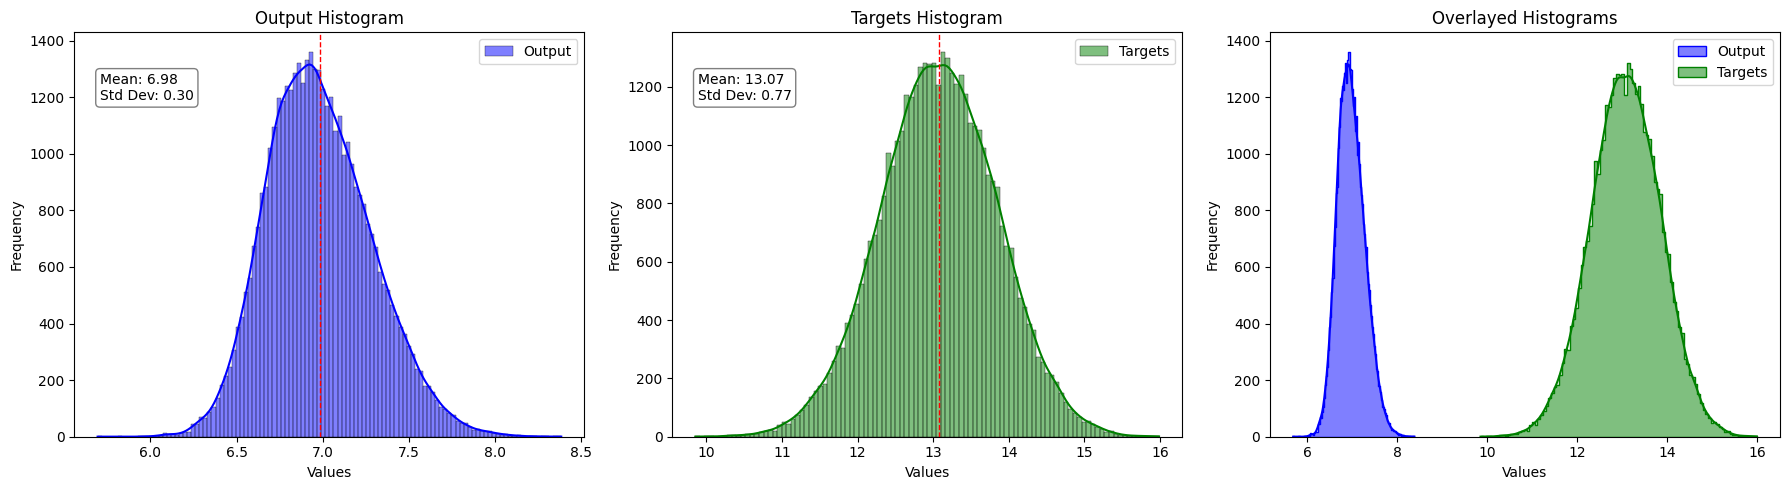

In [42]:
plot_histograms(benchmarkGen30['konv'].values, benchmarkGen30['true'].values)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


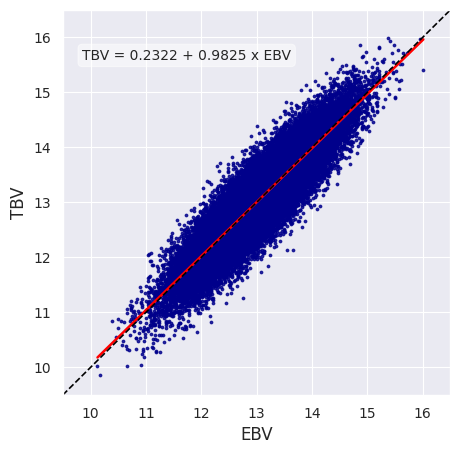

In [27]:
new_df = benchmarkGen30[['true', 'sstep']].copy()
new_df = new_df.rename(columns={'true': 'targets', 'sstep': 'output'})
createScatterPlot(new_df, 'ssGBLUP')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


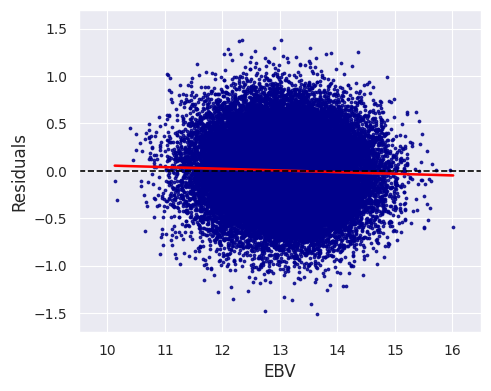

In [34]:
plot_residuals(benchmarkGen30['sstep'].values, benchmarkGen30['true'].values, 'ssGBLUP')

In [28]:
calcMetrics(benchmarkGen30['sstep'].values, benchmarkGen30['true'].values)

MSE: 0.11648718225214533
Mean Absolute Error: 0.272053035286935
R2 Score: 0.8057628504820812
Pearson Correlation Coefficient: 0.8977961270580602
p-value: 0.0
rmse: 0.34130218612271634
mape: 2.0905505782866944
mbe: 0.003377204475699265


In [46]:
stratifiedMetrics(benchmarkGen30['sstep'].values, benchmarkGen30['true'].values)


Metrics for Bin 1:
Mean Absolute Error: 0.3406058214792881

Metrics for Bin 2:
Mean Absolute Error: 0.26010157759387154

Metrics for Bin 3:
Mean Absolute Error: 0.31157919473319523


In [41]:
calcMetrics(benchmarkGen30['konv'].values, benchmarkGen30['true'].values)

MSE: 37.623926366575375
Mean Absolute Error: 6.090612687809032
R2 Score: -61.73620899591362
Pearson Correlation Coefficient: 0.34762793889766286
p-value: 0.0
rmse: 6.13383455650504
mape: 46.44526606261903
mbe: 6.090612687809032


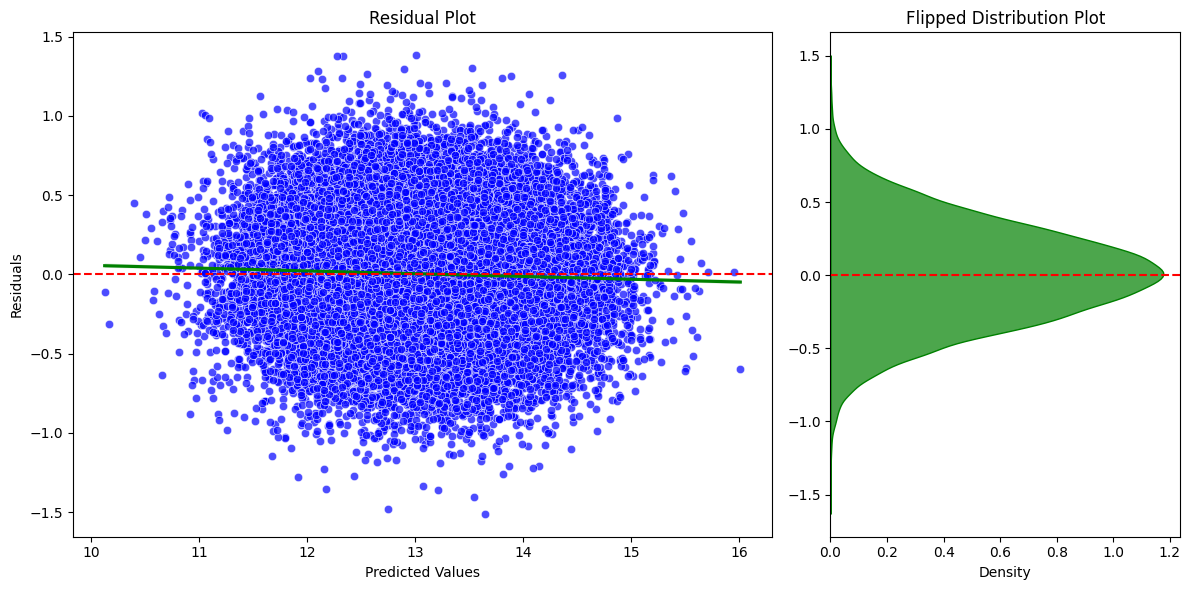

In [47]:
def plot_residuals_and_distribution(output_np, targets_np):
    # Calculate residuals
    residuals = targets_np - output_np

    # Create the figure with different subplot widths
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

    # Scatter plot of residuals against predicted values with blue points
    sns.scatterplot(x=output_np, y=residuals, color='blue', alpha=0.7, ax=axes[0])
    sns.regplot(x=output_np, y=residuals, scatter=False, color='green', ax=axes[0])
    axes[0].axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
    axes[0].set_xlabel('Predicted Values')
    axes[0].set_ylabel('Residuals')
    axes[0].set_title('Residual Plot')

    # Create the 90° flipped distribution plot using sns.kdeplot
    sns.kdeplot(y=residuals, color='green', alpha=0.7, fill=True, ax=axes[1])
    axes[1].axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
    axes[1].set_xlabel('Density')
    axes[1].set_title('Flipped Distribution Plot')

    plt.tight_layout()
    plt.show()
    
plot_residuals_and_distribution(benchmarkGen30['sstep'].values, benchmarkGen30['true'].values)

Text(0, 0.5, 'Value')

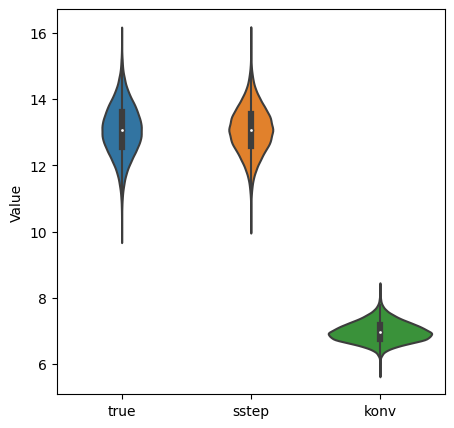

In [51]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
sns.violinplot(data=benchmarkGen30[["true", "sstep", "konv"]], ax=axs)
axs.set_ylabel("Value")

<Axes: >

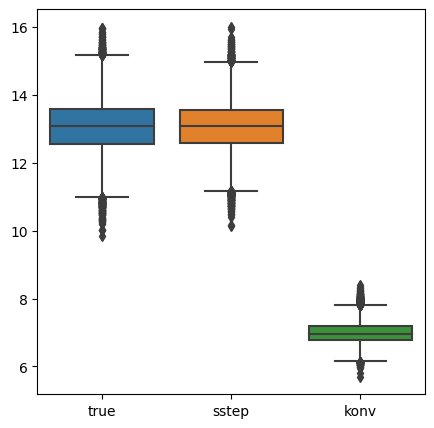

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(data=benchmarkGen30[["true", "sstep", "konv"]], ax=axs)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
sns.violinplot(data=benchmarkGen30[["true", "sstep", "konv"]], ax=axs)
axs.set_ylabel("Value")